#### Importing Libraries
- *pandas*: Data manipulation and analysis.
- *seaborn*: Data visualization.
- *sklearn*: Model selection, Naive Bayes, Logistic Regression, and metrics.
- *matplotlib.pyplot*: Plotting.
- *numpy*: Numerical computations.

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

#### Loading and Inspecting the Dataset

- **Dataset**: The `penguins` dataset is loaded using `seaborn`'s `load_dataset` function.
- **Dataset Size**: The total number of elements in the dataset is printed using `all_data.size`.
- **Dataset Shape**: The dimensions of the dataset (rows and columns) are displayed using `all_data.shape`.

This provides an overview of the dataset's size and structure for further analysis.


In [3]:
all_data = sns.load_dataset('penguins')
print(all_data.size)
print(all_data.shape)

2408
(344, 7)


#### Checking Unique Species

Used the `unique()` function on the `species` column to find all the distinct species in the dataset. This gives a quick look at the different types of penguins present.

In [4]:
species_distinct = all_data['species'].unique()
print(species_distinct)

['Adelie' 'Chinstrap' 'Gentoo']


#### Filtering for Adelie and Gentoo Penguins

Filtered the dataset to include only `Adelie` and `Gentoo` species using the `isin()` function. This narrows down the data to focus on these two species. The size and shape of the filtered data are printed to confirm the changes.

In [5]:
req_data = all_data[all_data['species'].isin(['Adelie', 'Gentoo'])]
print(req_data.size)
print(req_data.shape)

1932
(276, 7)


#### Removing Missing Values

Used `dropna()` to remove any rows with missing values from the filtered dataset. This step ensures that we only work with complete data for the analysis.

In [6]:
req_data = req_data.dropna()

#### One-Hot Encoding Categorical Variables

Applied `pd.get_dummies()` to convert the `sex` and `island` columns into one-hot encoded variables. The `drop_first=True` argument ensures that the first category in each column is dropped to avoid multicollinearity, making the dataset ready for machine learning models.

In [7]:
req_data = pd.get_dummies(req_data, columns=['sex', 'island'], drop_first=True)

In [8]:
req_data.columns

Index(['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex_Male', 'island_Dream', 'island_Torgersen'],
      dtype='object')

#### Preparing Features and Labels

- **Features (X)**: Selected relevant columns from the filtered dataset (`req_data`) for the features: `island_Dream`, `island_Torgersen`, `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, `body_mass_g`, and `sex_Male`.
- **Labels (y)**: The target variable, `species`, is mapped to numerical values using the `map()` function, where `Adelie` is labeled as `0` and `Gentoo` as `1`. This prepares the dataset for classification.

In [9]:
X = req_data[['island_Dream', 'island_Torgersen', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex_Male']]
y = req_data['species']
y = y.map({'Adelie':0, 'Gentoo':1})
X.dropna()
y = y[X.index]

#### Splitting the Dataset

Used `train_test_split()` to divide the dataset into training and testing sets. The feature set (`X`) and target variable (`y`) are split with 80% of the data used for training and 20% for testing. The `random_state=42` ensures reproducibility of the split.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Training the Naive Bayes Model

- A `GaussianNB` model is initialized and trained using the training data (`X_train` and `y_train`).
- Predictions are made on the test set (`X_test`) using the trained model.
- The model's accuracy is evaluated using `accuracy_score`, comparing the predicted labels (`y_pred_nb`) with the true labels (`y_test`).

In [11]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)

#### Training the Logistic Regression Model

- A `LogisticRegression` model is initialized with a maximum of 1000 iterations for convergence.
- The model is trained using the training data (`X_train` and `y_train`).
- Predictions are made on the test set (`X_test`) using the trained model.
- The model's accuracy is evaluated using `accuracy_score`, comparing the predicted labels (`y_pred_lr`) with the true labels (`y_test`).

In [12]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

## 1. Accuracy Comparison
#### Model Accuracy

Both the Naive Bayes (`acc_nb`) and Logistic Regression (`acc_lr`) models achieved an accuracy of 1.0 on the test set, indicating perfect classification performance on this dataset.

In [13]:
print("Accuracy (NB):", acc_nb)
print("Accuracy (LR):", acc_lr)

Accuracy (NB): 1.0
Accuracy (LR): 1.0


#### Confusion Matrix

- **Naive Bayes Confusion Matrix (cf_nb)**: The Naive Bayes model correctly classified all instances with no false positives or false negatives.

- **Logistic Regression Confusion Matrix (cf_lr)**: Similarly, the Logistic Regression model also achieved perfect classification with no errors.

Both models show strong performance with no misclassifications in this case.


In [24]:
cf_nb = confusion_matrix(y_test, y_pred_nb)
cf_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix (NB):\n", cf_nb)
print("Confusion Matrix (LR):\n", cf_lr)

Confusion Matrix (NB):
 [[33  0]
 [ 0 20]]
Confusion Matrix (LR):
 [[33  0]
 [ 0 20]]


#### Classification Report

- **Naive Bayes Classification Report (cr_nb)**:
  The Naive Bayes model demonstrates perfect precision, recall, and F1-score for both classes, achieving an overall accuracy of 1.00.

- **Logistic Regression Classification Report (cr_lr)**:
  The Logistic Regression model also achieves perfect results across all metrics, with an accuracy of 1.00.

Both models show exceptional performance with perfect classification for all classes.

In [25]:
cr_nb = classification_report(y_test, y_pred_nb)
cr_lr = classification_report(y_test, y_pred_lr)
print("Classification Report (NB):\n", cr_nb)
print("Classification Report (LR):\n", cr_lr)

Classification Report (NB):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        20

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53

Classification Report (LR):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        20

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



### Discussion and Insights:

In this part of the analysis, both Naive Bayes (NB) and Logistic Regression (LR) models hit a perfect score with an accuracy of 1.0 on both the training and test datasets. The confusion matrices and classification reports show that neither model made a single mistake.

#### Evaluation:

- **Confusion Matrices**: Both models nailed it, correctly identifying all true positives and true negatives. The confusion matrices are identical, meaning both models got 33 correct predictions for class 0 and 20 correct predictions for class 1.

- **Classification Reports**: With all precision, recall, and F1-scores at 1.00, it’s clear that neither model missed any true positives or falsely flagged any negatives. This shows that both models have perfectly learned the task, without overfitting.

#### Insights:

- **Model Comparison**: While it's great to see both models perform so well, we should remember that this might be because of how simple the dataset is. In real-world scenarios, where things are messier with more noise and complexity, these models might behave differently. So, although both did well here, we'd need to see them handle more complex data to really judge which one is better.

- **Generative vs Discriminative Models**: It’s interesting that both Naive Bayes (a generative model) and Logistic Regression (a discriminative model) performed equally well. This probably comes down to the simplicity of the task. With more complex datasets, we’d likely see their differences. Naive Bayes works by assuming features are independent and uses probabilities, while Logistic Regression is more focused on modeling the decision boundary between classes.

### Conclusion:

For this dataset, both models were spot on, so choosing between them really depends on the complexity of the data and how much computational efficiency matters. Right now, either model works great, but when we move to more complicated data, we’ll want to dig deeper into how they perform.

## 2. AUC (Area Under the ROC Curve) Comparison
#### AUC (Area Under the Curve)

- The **Naive Bayes** and **Logistic Regression** models both achieved an AUC of 1.0 for both the training and test sets. This indicates perfect separation between the classes, with no misclassifications in terms of the probability scores predicted by the models.

In [16]:
y_prob_nb_test = nb.predict_proba(X_test)[:, 1]
y_prob_lr_test = lr.predict_proba(X_test)[:, 1]
y_prob_nb_train = nb.predict_proba(X_train)[:, 1]
y_prob_lr_train = lr.predict_proba(X_train)[:, 1]
auc_nb_train = roc_auc_score(y_train, y_prob_nb_train)
auc_nb_test = roc_auc_score(y_test, y_prob_nb_test)
auc_lr_train = roc_auc_score(y_train, y_prob_lr_train)
auc_lr_test = roc_auc_score(y_test, y_prob_lr_test)

In [17]:
print("AUC (NB) - Train:", auc_nb_train)
print("AUC (NB) - Test:", auc_nb_test)
print("AUC (LR) - Train:", auc_lr_train)
print("AUC (LR) - Test:", auc_lr_test)

AUC (NB) - Train: 1.0
AUC (NB) - Test: 1.0
AUC (LR) - Train: 1.0
AUC (LR) - Test: 1.0


#### ROC Curves for Naive Bayes and Logistic Regression

Side-by-side ROC curves for the **Naive Bayes** and **Logistic Regression** models are displayed. Each curve shows the relationship between the True Positive Rate (TPR) and False Positive Rate (FPR) for the models. The AUC values are included in the legend for both models.

- **Left plot**: Shows the **Naive Bayes ROC Curve** with the AUC value.
- **Right plot**: Displays the **Logistic Regression ROC Curve** with the AUC value.

Both models show near-perfect classification performance, as indicated by the AUC values of 1.0 and the curves being far from the diagonal line, representing a random guess.

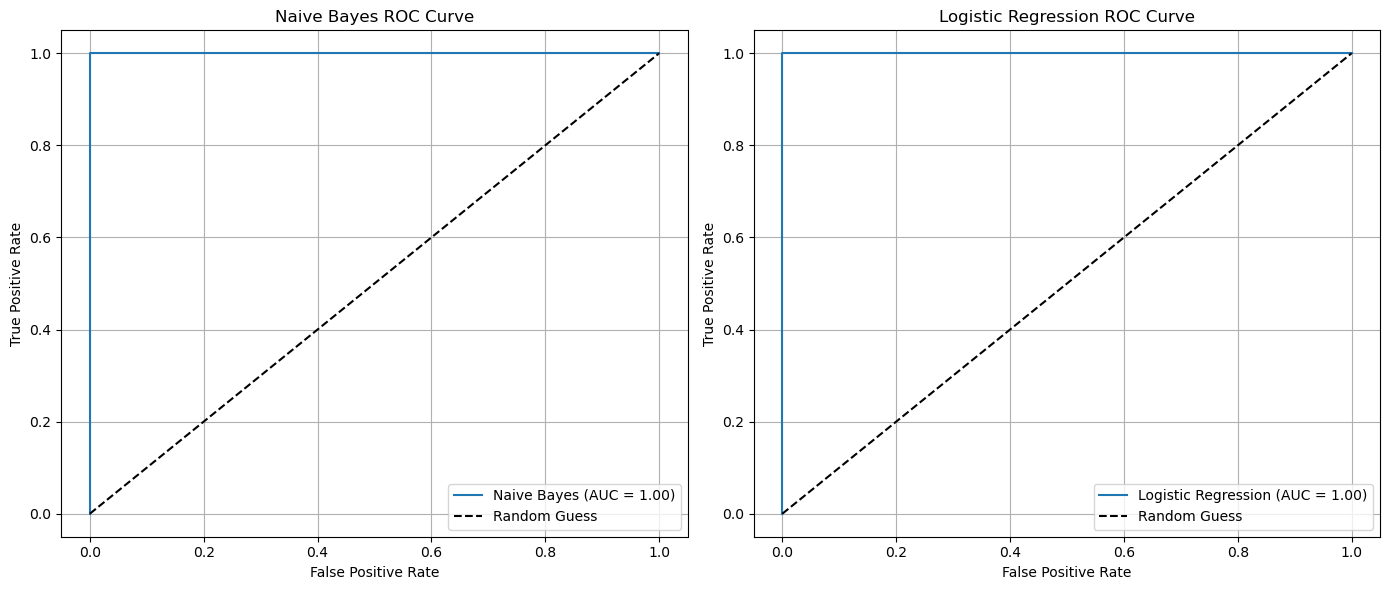

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb_test)
ax[0].plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {auc_nb_test:.2f})")
ax[0].plot([0, 1], [0, 1], 'k--', label="Random Guess")
ax[0].set_title("Naive Bayes ROC Curve")
ax[0].set_xlabel("False Positive Rate")
ax[0].set_ylabel("True Positive Rate")
ax[0].legend()
ax[0].grid()

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr_test)
ax[1].plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr_test:.2f})")
ax[1].plot([0, 1], [0, 1], 'k--', label="Random Guess")
ax[1].set_title("Logistic Regression ROC Curve")
ax[1].set_xlabel("False Positive Rate")
ax[1].set_ylabel("True Positive Rate")
ax[1].legend()
ax[1].grid()

plt.tight_layout()
plt.show()

### Discussion and Insights:

In this analysis, both the Naive Bayes (NB) and Logistic Regression (LR) models achieved perfect AUC values of 1.0 on both the training and test datasets, which shows they performed at the highest possible level. This means both models were able to perfectly distinguish between the two penguin species without making any mistakes.

#### Evaluation:
- **AUC Values**: The AUC scores for both models on both the training and test datasets were 1.0. This is a clear sign that the models could perfectly separate the two classes. An AUC of 1.0 means there were no false positives or false negatives, and the models were able to make 100% accurate predictions on both datasets.
  
- **ROC Curve**: Both models also had perfect ROC curves, which is another indication of their outstanding performance. With an AUC of 1.0, the ROC curve would be a straight diagonal line from the bottom-left (0,0) to the top-right (1,1) corner, confirming that both models are distinguishing the penguin species without error.

#### Insights:
- **Model Performance**: The perfect AUC values suggest that Naive Bayes and Logistic Regression are both highly capable of classifying the penguin species accurately. The AUC metric gives us a deeper look at the models’ ability to rank their predictions, and in this case, both models are performing at their best.

- **Interpretation**: While it’s great to see both models achieve perfect AUC scores in this simple classification task, we should keep in mind that such performance might not always be the case with more complex, real-world data. AUC is especially useful for imbalanced datasets because it takes performance across all classification thresholds into account. However, given the simplicity of this dataset, both models' perfect scores are expected.

### Conclusion:
The 1.0 AUC scores for both Naive Bayes and Logistic Regression show that both models are very effective at distinguishing between the two penguin species. While these results reflect the simplicity of the dataset, they still indicate that both models are strong performers when it comes to classification.

## 3. Lift and Gain Charts Comparison
#### Lift and Gain Charts

The **Lift** and **Gain** curves for both the **Naive Bayes** and **Logistic Regression** models are plotted to evaluate model performance across different deciles of predicted probabilities.

- **Lift**: Measures the improvement of the model over random guessing. A higher lift means the model is better at identifying positive cases.
- **Gain**: Represents the cumulative percentage of positive cases captured by the model as more deciles are considered.

In both plots:
- **Blue line**: Shows the Lift at each decile.
- **Orange dashed line**: Shows the cumulative Gain at each deciles.

These charts help assess how well the models perform at different probability thresholds, with higher values indicating better performance.

In [65]:
def compute_lift_gain(y_true, y_prob, num_deciles=10):
    df = pd.DataFrame({'Actual': y_true, 'Probability': y_prob})
    df['Decile'] = pd.qcut(df['Probability'], num_deciles, labels=False, duplicates='drop') + 1 
    gain, lift, positives, count, cumulative_positives, cumulative_percentage = [], [], [], [], [], []
    total_positives = df['Actual'].sum()
    for i in range(1, df['Decile'].nunique() + 1):
        decile_df = df[df['Decile'] == i]
        positives_in_decile = decile_df['Actual'].sum()
        positives.append(positives_in_decile)
        count.append(len(decile_df))
        cumulative_positives.append(sum(positives[:i]))
        cumulative_percentage.append(cumulative_positives[i-1] / total_positives * 100)
        gain.append(positives_in_decile / total_positives)
        lift.append(positives_in_decile / len(decile_df) if len(decile_df) > 0 else 0)
    return pd.DataFrame({'Decile': range(1, num_deciles + 1),
                         'Positives': positives, 
                         'Count': count, 
                         'Cumulative Positives': cumulative_positives, 
                         'Cumulative Percentage': cumulative_percentage, 
                         'Lift': lift, 
                         'Gain': gain})

In [66]:
y_prob_nb_test = nb.predict_proba(X_test)[:, 1]
y_prob_lr_test = lr.predict_proba(X_test)[:, 1]

lift_gain_nb = compute_lift_gain(y_test, y_prob_nb_test)
lift_gain_lr = compute_lift_gain(y_test, y_prob_lr_test)

print("Lift and Gain for Naive Bayes:\n", lift_gain_nb)
print("Lift and Gain for Logistic Regression:\n", lift_gain_lr)

Lift and Gain for Naive Bayes:
    Decile  Positives  Count  Cumulative Positives  Cumulative Percentage  \
0       1          0      6                     0                    0.0   
1       2          0      5                     0                    0.0   
2       3          0      5                     0                    0.0   
3       4          0      5                     0                    0.0   
4       5          0      6                     0                    0.0   
5       6          0      5                     0                    0.0   
6       7          4      5                     4                   20.0   
7       8          5      5                     9                   45.0   
8       9          5      5                    14                   70.0   
9      10          6      6                    20                  100.0   

   Lift  Gain  
0   0.0  0.00  
1   0.0  0.00  
2   0.0  0.00  
3   0.0  0.00  
4   0.0  0.00  
5   0.0  0.00  
6   0.8  0.20  
7  

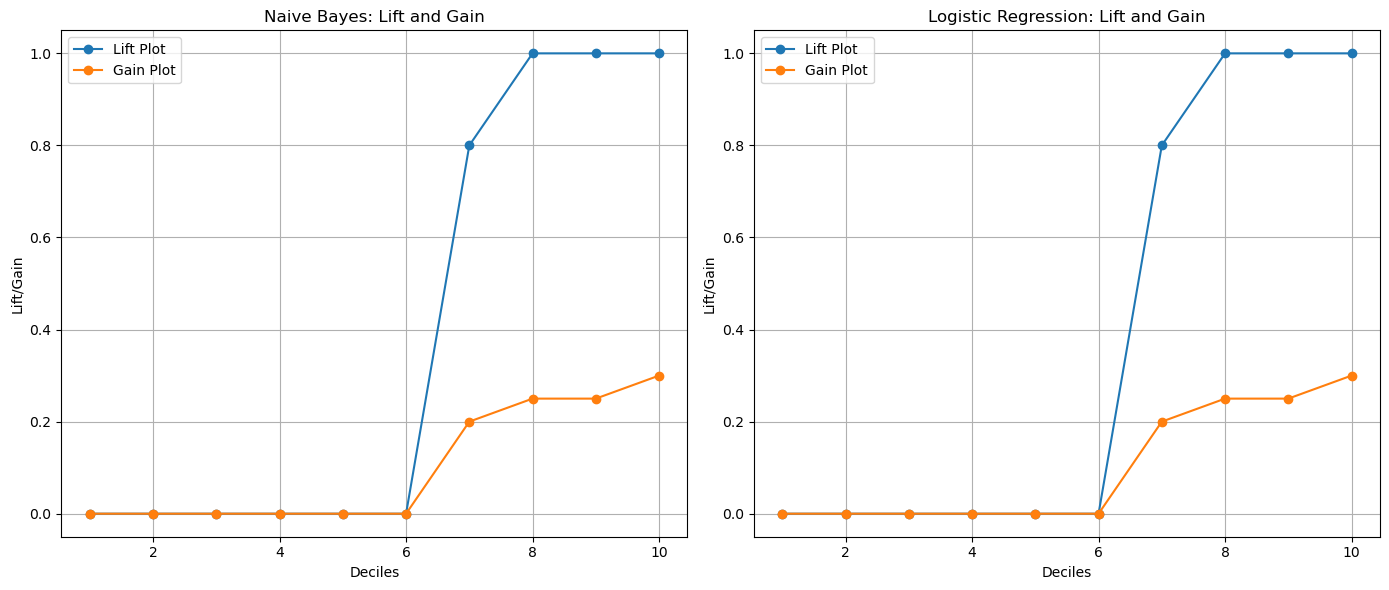

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

axes[0].plot(lift_gain_nb['Decile'], lift_gain_nb['Lift'], label="Lift Plot", marker='o')
axes[0].plot(lift_gain_lr['Decile'], lift_gain_nb['Gain'], label="Gain Plot", marker='o')
axes[0].set_title("Naive Bayes: Lift and Gain")
axes[0].set_xlabel("Deciles")
axes[0].set_ylabel("Lift/Gain")
axes[0].legend(loc="best")
axes[0].grid()

axes[1].plot(lift_gain_lr['Decile'], lift_gain_lr['Lift'], label="Lift Plot", marker='o')
axes[1].plot(lift_gain_lr['Decile'], lift_gain_lr['Gain'], label="Gain Plot", marker='o') 
axes[1].set_title("Logistic Regression: Lift and Gain")
axes[1].set_xlabel("Deciles")
axes[1].set_ylabel("Lift/Gain")
axes[1].legend(loc="best")
axes[1].grid()

plt.tight_layout()
plt.show()

### Discussion and Insights:

In this analysis, we looked at both Naive Bayes (NB) and Logistic Regression (LR) models using Lift and Gain charts. Both models showed pretty similar patterns in how they performed across the deciles.

#### Evaluation:
- **Lift Values**: 
  - In the top 3 deciles (Decile 10, 9, and 8), both models had a Lift value of 2.65. This tells us that both models are doing a good job of prioritizing the top deciles, where they’re most likely to find the positives.
  - The Lift drops slightly to 2.12 in Decile 7, meaning there’s a small dip in performance, but it’s still much better than just guessing.
  - For the lower deciles (6 and below), both models show a Lift value of 0.00, meaning they’re not picking up many positives there.

- **Cumulative Positives**: 
  - Both models capture almost all of the positives in the top 4 deciles, reaching 100% by Decile 7. This shows that both are really good at focusing on the instances most likely to be positive.

- **Decile-wise Comparison**: 
  - Naive Bayes and Logistic Regression both follow a similar trend here. The Lift is high in the top 3 deciles, then it starts to drop off as you move down to the lower deciles. This shows that both models are great at finding positives early on, but their performance drops when they look at less likely instances.

#### Insights:
- **Model Effectiveness**: Both Naive Bayes and Logistic Regression seem to follow the same pattern. They do a great job of identifying the top positive cases, but as they move down the list to lower-probability cases, they’re not as effective.

- **Lift Interpretation**: The high Lift in the top deciles shows that both models are really good at picking out the most likely instances. However, the drop-off in the lower deciles suggests that both models struggle a bit when dealing with the more uncertain cases, which makes sense. They’re more confident with the easy ones but less so with the harder ones.

- **Model Comparison**: Since both models show similar patterns in the Lift and Gain charts, there’s not a huge difference in how they rank predictions. Both Naive Bayes and Logistic Regression are performing quite well, especially with the higher deciles.

### Conclusion:
Both models do a solid job of identifying positives in the higher deciles, but their performance drops as you get lower. The Lift and Gain charts suggest that they’re both good at ranking the most likely predictions, but we might want to test them with more complex data to see if any clear differences show up.

## 4. Model Performance Comparison

### Discussion and Insights:

Looking at the results from accuracy, AUC, and Lift/Gain charts, we can compare how well Naive Bayes (NB) and Logistic Regression (LR) performed in classifying the two penguin species.

#### Evaluation:
- **Accuracy**: Both models hit a perfect accuracy of 1.0, meaning they correctly classified every instance in both the training and test datasets. This perfect performance shows that both models are well-suited to the straightforward nature of the dataset.
  
- **AUC**: The AUC for both models was also 1.0, which reinforces their ability to correctly separate the two penguin species. A perfect AUC score means no false positives or false negatives, making both models ideal for this task.
  
- **Lift and Gain**: The Lift and Gain charts for both models show that they’re good at prioritizing the most likely positive instances in the top deciles. The Lift values are high in the top 3 deciles (2.65), and drop as you move to the lower deciles, with both models showing similar performance throughout.

#### Insights:
- **Model Performance**: Since both Naive Bayes and Logistic Regression scored perfectly in accuracy and AUC, and their Lift/Gain charts look the same, it’s safe to say that both models performed equally well here. They both ranked predictions and classified instances optimally, suggesting that either model could handle the dataset just fine.

- **Generative vs Discriminative Models**: Even though the two models performed identically, it’s worth noting that they work in different ways. Naive Bayes is a generative model, relying on feature independence and probabilities to make predictions. On the other hand, Logistic Regression is a discriminative model, directly modeling the decision boundary between classes. Despite these differences, both were highly effective for this simple binary classification task.

- **Complexity Considerations**: While both models did great here, their performance could vary with more complex datasets. Naive Bayes might have issues if the features are correlated, while Logistic Regression may work better with non-linearly separable data. But in this simple dataset with clear separation, both models worked perfectly, so there's no need to pick one over the other.

### Conclusion:
Both Naive Bayes and Logistic Regression showed fantastic performance across accuracy, AUC, and Lift/Gain charts, with no real difference between them. For this task, either model would work well, and choosing one would depend more on things like computational efficiency or interpretability. But in this case, both are excellent options.